# One-way ANOVA

***

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

In [1]:
import pandas as pd

import seaborn as sns

import scipy.stats as ss

import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Assumption 1: Dependent Variable

In [22]:
# dependent variable
dependent = df['petal_length']

### Assumption 2: Independent Variable

In [23]:
#indenendent variable
independent = df['species']

### Assumption 4: Outliers

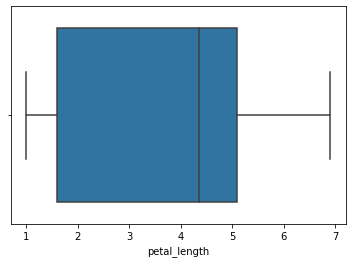

In [24]:
#outliers
sns.boxplot(x=dependent);

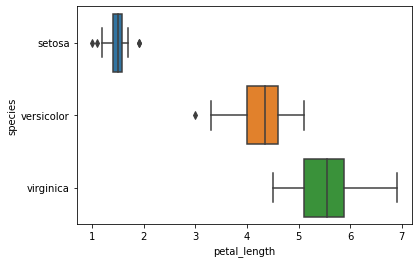

In [25]:
#outliers by cat
sns.boxplot(x=dependent,y=independent);

In [30]:
twenty_fifth_quantile = df.petal_length.quantile(.25)
seventy_fifth_quantile = df.petal_length.quantile(.75)

In [31]:
inter_quartile_range = (seventy_fifth_quantile - twenty_fifth_quantile)*1.5

In [32]:
upper = seventy_fifth_quantile + inter_quartile_range
upper

10.349999999999998

In [33]:
lower = twenty_fifth_quantile - inter_quartile_range
lower

-3.649999999999999

### Assumption 5: Normality

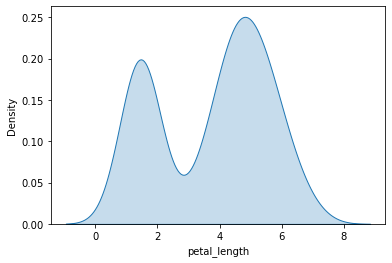

In [34]:
sns.kdeplot(dependent,fill=True);

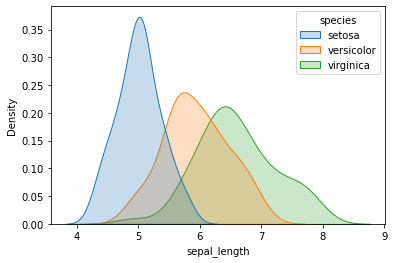

In [35]:
sns.kdeplot('sepal_length',fill=True,hue='species',data=df);

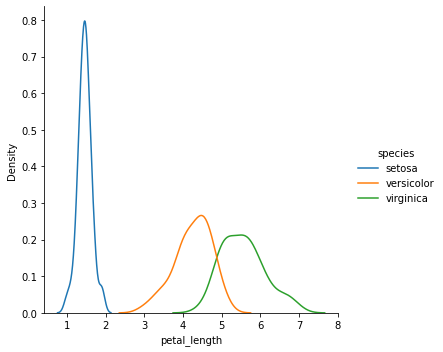

In [36]:
sns.displot(x=dependent,hue=independent,kind='kde');

#### shapiro test for normality

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [37]:
#extract setosa sepal_length
sepal_len_setosa = dependent[independent == 'setosa']
sepal_len_versi = dependent[independent == 'versicolor']
sepal_len_vir = dependent[independent == 'virginica']


In [38]:
# run shapiro wilks test
print(ss.shapiro(sepal_len_setosa))
print(ss.shapiro(sepal_len_versi))
print(ss.shapiro(sepal_len_vir))

# p value > 0.05 consdier data normal

ShapiroResult(statistic=0.9549458622932434, pvalue=0.05464918911457062)
ShapiroResult(statistic=0.9660047888755798, pvalue=0.1584833413362503)
ShapiroResult(statistic=0.9621862769126892, pvalue=0.10977369546890259)


### Assumption 6: Homogeneity of Variances

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html



In [39]:
#test for equal variances

# p < .05 unequal variance
ss.levene(
    sepal_len_setosa,
    sepal_len_versi,
    sepal_len_vir  
)

LeveneResult(statistic=19.72005532503458, pvalue=2.5892961840828553e-08)

<br>

### One-way ANOVA

Even thoug assumption 6 and possible 4 a re looking bad we will continue for learning purposes

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

***


In [40]:
#ANOVA

ss.f_oneway(
    sepal_len_setosa,
    sepal_len_versi,
    sepal_len_vir  
)

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)

* tiny p_value means reject null hypothesis

**Conclusion** the mean sepal lengths of setosa,versicolor and virginicas are different

In [41]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [42]:
# Perform the test.
welch_anova_np(
    sepal_len_setosa,
    sepal_len_versi,
    sepal_len_vir 
)

F_onewayResult(statistic=1826.580952419748, pvalue=2.853130661604845e-66)

**Conclusion** the mean sepal lengths of setosa,versicolor and virginicas are different

### Post Hoc Tukey Test

In [43]:

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=dependent,
                          groups=independent,
                          alpha=0.05)

#display results
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.796 0.001 2.5922 2.9998   True
    setosa  virginica    4.088 0.001 3.8842 4.2918   True
versicolor  virginica    1.292 0.001 1.0882 1.4958   True
---------------------------------------------------------
